In [5]:
"""
Resource: 
https://www.youtube.com/watch?v=D9sU1hLT0QY
https://github.com/nicknochnack/Reinforcement-Learning-for-Trading/blob/main/Reinforcement%20Learning%20GME%20Trading%20Tutorial.ipynb
"""

'\nResource: \nhttps://www.youtube.com/watch?v=D9sU1hLT0QY\nhttps://github.com/nicknochnack/Reinforcement-Learning-for-Trading/blob/main/Reinforcement%20Learning%20GME%20Trading%20Tutorial.ipynb\n'

# 0. Install and Import dependencies

In [1]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616830 sha256=bab7927c30f27925cc8d05f6fc1bf692739d1d08c48c3b099a53359ba13d508f
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\76\ee\9c\36bfe3e079df99acf5ae57f4e3464ff2771b34447d6d2f2148
Successfully built gym
  Attempting uninstall: zipp
    Found existing installation: zipp 0.6.0
    Uninstalling zipp-0.6.0:
      Successfully uninstalled zipp-0.6.0
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.1
    Uninstalling importlib-metadata-3.10.1:
      Successfully uninstalled importlib-metadata-3.10.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0
  Attempting uninstall: tensorboard
    Found

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
ERROR: Could not install packages due to an OSError: [WinError 5] Zugriff verweigert: 'C:\\Anaconda3\\Lib\\site-packages\\tensorflow_core\\lite\\experimental\\microfrontend\\python\\ops\\_audio_microfrontend_op.so'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install gym_anytrading

  Using cached gym_anytrading-1.2.0-py3-none-any.whl (171 kB)


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [8]:
!pip install stable_baselines

  Using cached stable_baselines-2.10.2-py3-none-any.whl (240 kB)


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [11]:
# Gym stuff
import gym
import gym_anytrading

In [27]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
#gives error
from stable_baselines.common.vec_env import DummyVecEnv
#from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-27-f96de75dd654>", line 7, in <module>
    from stable_baselines.common.vec_env import DummyVecEnv
  File "C:\Anaconda3\lib\site-packages\stable_baselines\__init__.py", line 4, in <module>
    from stable_baselines.a2c import A2C
  File "C:\Anaconda3\lib\site-packages\stable_baselines\a2c\__init__.py", line 1, in <module>
    from stable_baselines.a2c.a2c import A2C
  File "C:\Anaconda3\lib\site-packages\stable_baselines\a2c\a2c.py", line 8, in <module>
    from stable_baselines.common import explained_variance, tf_util, ActorCriticRLModel, SetVerbosity, TensorboardWriter
  File "C:\Anaconda3\lib\site-packages\stable_baselines\common\__init__.py", line 7, in <module>
    from stable_baselines.common.base_class import BaseRLModel, ActorCriticRLModel, OffPolicyRLModel, SetVerbosity,

AttributeError: module 'tensorflow' has no attribute 'float32'

In [14]:
import os 
os.getcwd()

'C:\\Users\\Asus'

# 1. Bring in the Data

In [16]:
df = pd.read_csv('gmedata.csv')

In [18]:
df.head()

,Date,Open,High,Low,Close,Volume
0,03/12/2021,275.00,295.50,262.27,264.5,"25,845,900"
1,03/11/2021,241.64,281.50,232.60,260.0,"28,312,490"
2,03/10/2021,269.43,348.50,172.00,265.0,"71,570,570"
3,03/09/2021,217.71,249.85,208.51,246.9,"39,099,328"
4,03/08/2021,154.89,210.87,146.10,194.5,"63,565,621"


In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [20]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-12,275.00,295.50,262.27,264.5,"25,845,900"
2021-03-11,241.64,281.50,232.60,260.0,"28,312,490"
2021-03-10,269.43,348.50,172.00,265.0,"71,570,570"
2021-03-09,217.71,249.85,208.51,246.9,"39,099,328"
2021-03-08,154.89,210.87,146.10,194.5,"63,565,621"


# 2. Build Environment

In [21]:
# RL environment
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

In [22]:
env.signal_features

array([[ 2.6450e+02,  0.0000e+00],
       [ 2.6000e+02, -4.5000e+00],
       [ 2.6500e+02,  5.0000e+00],
       [ 2.4690e+02, -1.8100e+01],
       [ 1.9450e+02, -5.2400e+01],
       [ 1.3774e+02, -5.6760e+01],
       [ 1.3235e+02, -5.3900e+00],
       [ 1.2418e+02, -8.1700e+00],
       [ 1.1818e+02, -6.0000e+00],
       [ 1.2040e+02,  2.2200e+00],
       [ 1.0174e+02, -1.8660e+01],
       [ 1.0873e+02,  6.9900e+00],
       [ 9.1710e+01, -1.7020e+01],
       [ 4.4970e+01, -4.6740e+01],
       [ 4.6000e+01,  1.0300e+00],
       [ 4.0590e+01, -5.4100e+00],
       [ 4.0690e+01,  1.0000e-01],
       [ 4.5940e+01,  5.2500e+00],
       [ 4.9510e+01,  3.5700e+00],
       [ 5.2400e+01,  2.8900e+00],
       [ 5.1100e+01, -1.3000e+00],
       [ 5.1200e+01,  1.0000e-01],
       [ 5.0310e+01, -8.9000e-01],
       [ 6.0000e+01,  9.6900e+00],
       [ 6.3770e+01,  3.7700e+00],
       [ 5.3500e+01, -1.0270e+01],
       [ 9.2410e+01,  3.8910e+01],
       [ 9.0000e+01, -2.4100e+00],
       [ 2.2500e+02,

In [23]:
env.action_space

Discrete(2)

info {'total_reward': -178.72999999999993, 'total_profit': 0.331963236060549, 'position': 1}


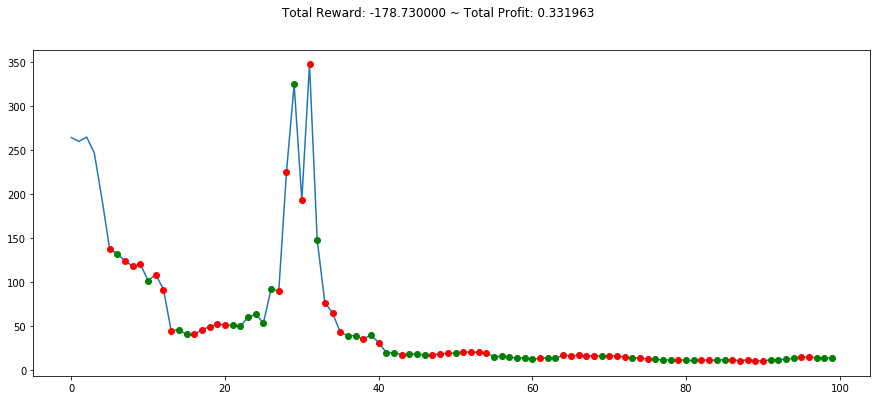

In [26]:
# always random steps, baseline 
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

